In [20]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [21]:
sample_submission = pd.read_csv('./data/sample_submission.csv')
test_data = pd.read_csv('./data/test.csv')
train_data = pd.read_csv('./data/train.csv')

In [22]:
print(train_data.shape)
train_data.head()

(5872, 10)


,ID,추석까지 남은 기간(주),쇼핑몰 구분,가격(원),프로모션 여부,도시 유형,지역 유형,쇼핑몰 유형,선물 유형,수요량
0,TRAIN_0000,1,쇼핑몰 15,212000,0,도시 6,지역 1,쇼핑몰 유형 2,명절혼합과일선물세트,28
1,TRAIN_0001,2,쇼핑몰 72,113000,0,도시 21,지역 1,쇼핑몰 유형 1,발효홍삼선물세트,27
2,TRAIN_0002,0,쇼핑몰 15,67000,0,도시 6,지역 1,쇼핑몰 유형 2,실속스팸선물세트,769
3,TRAIN_0003,1,쇼핑몰 13,206000,0,도시 12,지역 3,쇼핑몰 유형 1,자연산프리미엄버섯선물세트,27
4,TRAIN_0004,1,쇼핑몰 65,140000,0,도시 16,지역 2,쇼핑몰 유형 2,자연산새우선물세트,337


In [23]:
print(test_data.shape)
print(sample_submission.shape)
test_data.head()

(3915, 9)
(3915, 2)


,ID,추석까지 남은 기간(주),쇼핑몰 구분,가격(원),프로모션 여부,도시 유형,지역 유형,쇼핑몰 유형,선물 유형
0,TEST_0000,2,쇼핑몰 71,113000,0,도시 16,지역 3,쇼핑몰 유형 1,상주반건시곶감선물세트
1,TEST_0001,0,쇼핑몰 57,224000,0,도시 6,지역 1,쇼핑몰 유형 2,고급한과선물세트
2,TEST_0002,2,쇼핑몰 38,150000,0,도시 16,지역 1,쇼핑몰 유형 2,최고의선택스팸선물세트
3,TEST_0003,1,쇼핑몰 50,132000,0,도시 16,지역 3,쇼핑몰 유형 1,재래김특선세트
4,TEST_0004,0,쇼핑몰 55,146000,0,도시 5,지역 4,쇼핑몰 유형 2,명품샤인머스캣선물세트


In [24]:
train_data.rename(columns={
    '추석까지 남은 기간(주)' : 'week_to_chuseok',
    '쇼핑몰 구분' : 'mall',
    '가격(원)' : 'price',
    '프로모션 여부' : 'promotion',
    '도시 유형' : 'city_type',
    '지역 유형' : 'local_type',
    '쇼핑몰 유형' : 'mall_type',
    '선물 유형' : 'gift_type',
    '수요량' : 'demand'
}, inplace=True)

In [25]:
train_data.head()

,ID,week_to_chuseok,mall,price,promotion,city_type,local_type,mall_type,gift_type,demand
0,TRAIN_0000,1,쇼핑몰 15,212000,0,도시 6,지역 1,쇼핑몰 유형 2,명절혼합과일선물세트,28
1,TRAIN_0001,2,쇼핑몰 72,113000,0,도시 21,지역 1,쇼핑몰 유형 1,발효홍삼선물세트,27
2,TRAIN_0002,0,쇼핑몰 15,67000,0,도시 6,지역 1,쇼핑몰 유형 2,실속스팸선물세트,769
3,TRAIN_0003,1,쇼핑몰 13,206000,0,도시 12,지역 3,쇼핑몰 유형 1,자연산프리미엄버섯선물세트,27
4,TRAIN_0004,1,쇼핑몰 65,140000,0,도시 16,지역 2,쇼핑몰 유형 2,자연산새우선물세트,337


In [26]:
test_data.rename(columns={
    '추석까지 남은 기간(주)' : 'week_to_chuseok',
    '쇼핑몰 구분' : 'mall',
    '가격(원)' : 'price',
    '프로모션 여부' : 'promotion',
    '도시 유형' : 'city_type',
    '지역 유형' : 'local_type',
    '쇼핑몰 유형' : 'mall_type',
    '선물 유형' : 'gift_type',
    '수요량' : 'demand'
}, inplace=True)

In [27]:
test_data.head()

,ID,week_to_chuseok,mall,price,promotion,city_type,local_type,mall_type,gift_type
0,TEST_0000,2,쇼핑몰 71,113000,0,도시 16,지역 3,쇼핑몰 유형 1,상주반건시곶감선물세트
1,TEST_0001,0,쇼핑몰 57,224000,0,도시 6,지역 1,쇼핑몰 유형 2,고급한과선물세트
2,TEST_0002,2,쇼핑몰 38,150000,0,도시 16,지역 1,쇼핑몰 유형 2,최고의선택스팸선물세트
3,TEST_0003,1,쇼핑몰 50,132000,0,도시 16,지역 3,쇼핑몰 유형 1,재래김특선세트
4,TEST_0004,0,쇼핑몰 55,146000,0,도시 5,지역 4,쇼핑몰 유형 2,명품샤인머스캣선물세트


In [28]:
print(train_data['mall'].str.contains('쇼핑몰').sum())
print(train_data['city_type'].str.contains('도시').sum())
print(train_data['local_type'].str.contains('지역').sum())
print(train_data['mall_type'].str.contains('쇼핑몰 유형').sum())

5872
5872
5872
5872


In [29]:
train_data['mall'] = train_data['mall'].str.replace('쇼핑몰', '').astype(int)
train_data['city_type'] = train_data['city_type'].str.replace('도시', '').astype(int)
train_data['local_type'] = train_data['local_type'].str.replace('지역', '').astype(int)
train_data['mall_type'] = train_data['mall_type'].str.replace('쇼핑몰 유형', '').astype(int)

In [30]:
train_data.head()

,ID,week_to_chuseok,mall,price,promotion,city_type,local_type,mall_type,gift_type,demand
0,TRAIN_0000,1,15,212000,0,6,1,2,명절혼합과일선물세트,28
1,TRAIN_0001,2,72,113000,0,21,1,1,발효홍삼선물세트,27
2,TRAIN_0002,0,15,67000,0,6,1,2,실속스팸선물세트,769
3,TRAIN_0003,1,13,206000,0,12,3,1,자연산프리미엄버섯선물세트,27
4,TRAIN_0004,1,65,140000,0,16,2,2,자연산새우선물세트,337


In [31]:
test_data['mall'] = test_data['mall'].str.replace('쇼핑몰', '').astype(int)
test_data['city_type'] = test_data['city_type'].str.replace('도시', '').astype(int)
test_data['local_type'] = test_data['local_type'].str.replace('지역', '').astype(int)
test_data['mall_type'] = test_data['mall_type'].str.replace('쇼핑몰 유형', '').astype(int)

In [32]:
test_data.head()

,ID,week_to_chuseok,mall,price,promotion,city_type,local_type,mall_type,gift_type
0,TEST_0000,2,71,113000,0,16,3,1,상주반건시곶감선물세트
1,TEST_0001,0,57,224000,0,6,1,2,고급한과선물세트
2,TEST_0002,2,38,150000,0,16,1,2,최고의선택스팸선물세트
3,TEST_0003,1,50,132000,0,16,3,1,재래김특선세트
4,TEST_0004,0,55,146000,0,5,4,2,명품샤인머스캣선물세트


In [33]:
train_data.head()

,ID,week_to_chuseok,mall,price,promotion,city_type,local_type,mall_type,gift_type,demand
0,TRAIN_0000,1,15,212000,0,6,1,2,명절혼합과일선물세트,28
1,TRAIN_0001,2,72,113000,0,21,1,1,발효홍삼선물세트,27
2,TRAIN_0002,0,15,67000,0,6,1,2,실속스팸선물세트,769
3,TRAIN_0003,1,13,206000,0,12,3,1,자연산프리미엄버섯선물세트,27
4,TRAIN_0004,1,65,140000,0,16,2,2,자연산새우선물세트,337


In [34]:
# 일단 gift_type가 한글데이터이므로 인코딩해줘야함
# mall, city_type, local_type, mall_type를 수로 표현했는데 이렇게 학습시키면 가까운 수 끼리 관계를 생성할 수 있음
# one-hot encoding으로 한다

d:\Anaconda3\envs\jupyter\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


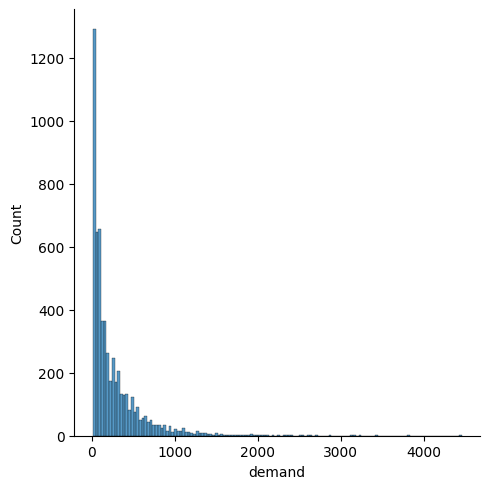

In [35]:
sns.displot(train_data['demand'])
plt.show()

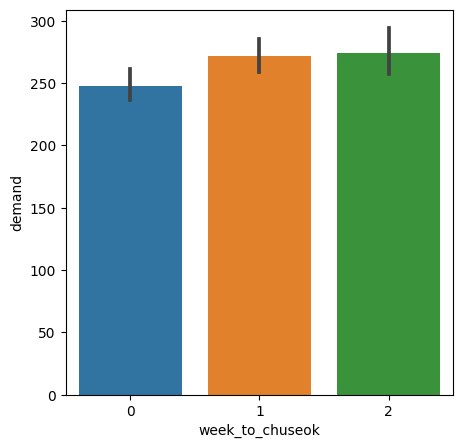

In [38]:
plt.figure(figsize=(5, 5))
sns.barplot(x = train_data['week_to_chuseok'], y = train_data['demand'])
plt.show()

<Axes: xlabel='local_type'>

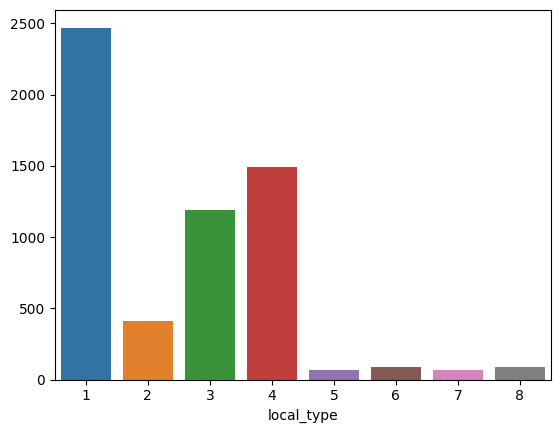

In [39]:
region_category = train_data['local_type'].value_counts().sort_index()
sns.barplot(x = region_category.index, y = region_category.values)

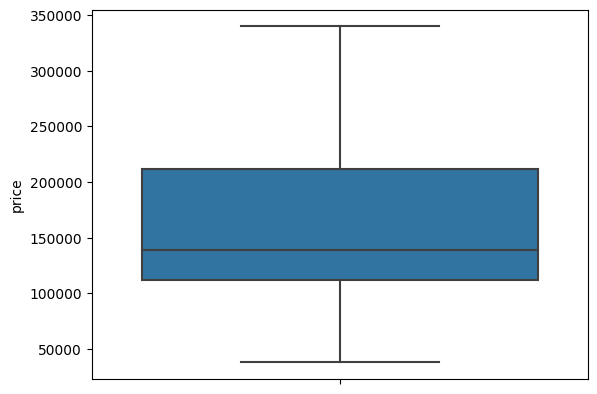

In [40]:
sns.boxplot(y = train_data['price'])
plt.show()